In [1]:
import pandas as pd 
import numpy as np
# numpy and pandas using for Data Handling
import matplotlib.pyplot as plt #Visulization 
import seaborn as sns

# Load CSV file
df = pd.read_csv("flavors_of_cocoa.csv")
df.head()


,Id,Company,Bean Origin,Review Date,Cocoa Percent,Company Location,Rating
0,1,A. Morin,Agua Grande,2016.0,63%,France,3.75
1,2,A. Morin,Kpime,2015.0,70%,France,2.75
2,3,A. Morin,Atsane,2015.0,70%,France,3.00
3,4,A. Morin,Akata,2015.0,70%,France,3.50
4,5,A. Morin,Quilla,2015.0,70%,France,3.50


task 1:- Data Cleaning 

In [5]:
# Check for null values
print(df.isnull().sum())

# Drop rows with missing 'Review Date'
df = df.dropna(subset=['Review Date'])

# Safely convert 'Cocoa Percent' to float
df['Cocoa Percent'] = df['Cocoa Percent'].astype(str).str.replace('%', '', regex=False).astype(float)


Id                  0
Company             0
Bean Origin         0
Review Date         0
Cocoa Percent       0
Company Location    0
Rating              0
dtype: int64


In [6]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

# Drop duplicates if any
df = df.drop_duplicates()


Duplicate rows: 0


all data are Unique 

In [8]:
# review Date now '2016.0' so we need to convert (int)2016
df['Review Date'] = df['Review Date'].astype(int)


In [9]:
#Trim Whitespace in Text Columns
df['Company'] = df['Company'].str.strip()
df['Bean Origin'] = df['Bean Origin'].str.strip()
df['Company Location'] = df['Company Location'].str.strip()


In [11]:
#Create a copy of the clean data for use
clean_df = df.copy()


Basic Exploration 

In [12]:
#Get Basic Stats of 'Rating'
print("Mean Rating:", df['Rating'].mean())
print("Median Rating:", df['Rating'].median())
print("Mode Rating:", df['Rating'].mode()[0])


Mean Rating: 3.185790061418202
Median Rating: 3.25
Mode Rating: 3.5


In [15]:
# Count the Number of Unique Companies and Locations
print("Unique Companies:", df['Company'].nunique())
print("Unique Company Locations:", df['Company Location'].nunique())

Unique Companies: 416
Unique Company Locations: 60


In [17]:
#Find Top 5 Most Common Bean Origins
top_bean_origins = df['Bean Origin'].value_counts().head(5)
print(top_bean_origins)

Bean Origin
Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Name: count, dtype: int64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


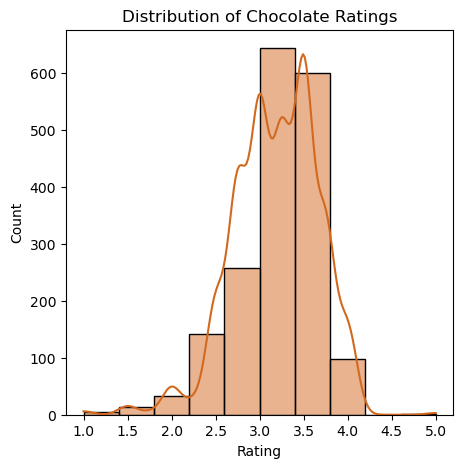

In [24]:
#Plot a Histogram of Chocolate Ratings
plt.figure(figsize=(5, 5))
sns.histplot(df['Rating'], bins=20, kde=True, color='chocolate')
plt.title("Distribution of Chocolate Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


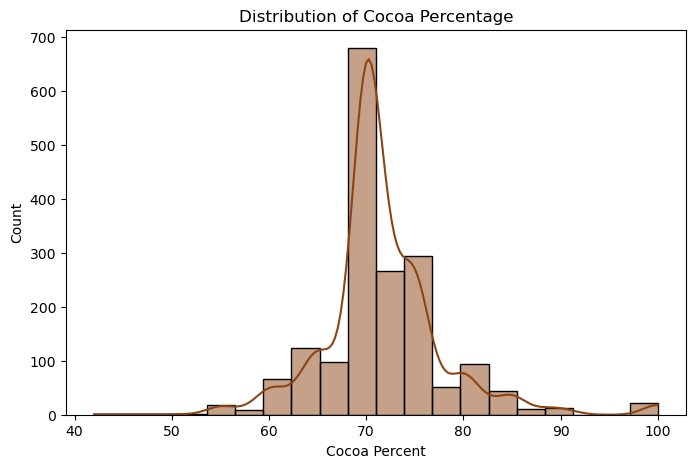

In [25]:
#Plot Cocoa Percentage Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Cocoa Percent'], bins=20, kde=True, color='saddlebrown')
plt.title("Distribution of Cocoa Percentage")
plt.xlabel("Cocoa Percent")
plt.ylabel("Count")
plt.show()

In [29]:
#Get Top 5 Highest Rated Chocolates
top_rated = df.sort_values(by='Rating', ascending=False).head(5)
top_rated[['Company', 'Rating', 'Cocoa Percent', 'Bean Origin']]

,Company,Rating,Cocoa Percent,Bean Origin
86,Amedei,5.0,70.0,Toscano Black
78,Amedei,5.0,70.0,Chuao
918,L.A. Burdick (Felchlin),4.0,70.0,Brazil
77,Amedei,4.0,75.0,Nine
719,Fruition,4.0,74.0,"Coto Brus, Heirloom, Batch 1"


In [30]:
#Find Average Rating per Company
avg_rating_per_company = df.groupby('Company')['Rating'].mean().sort_values(ascending=False)
avg_rating_per_company.head(5)  # Top 5companies by average rating


Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Name: Rating, dtype: float64

Intermediate Level task (Group, Compare, Visualize)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


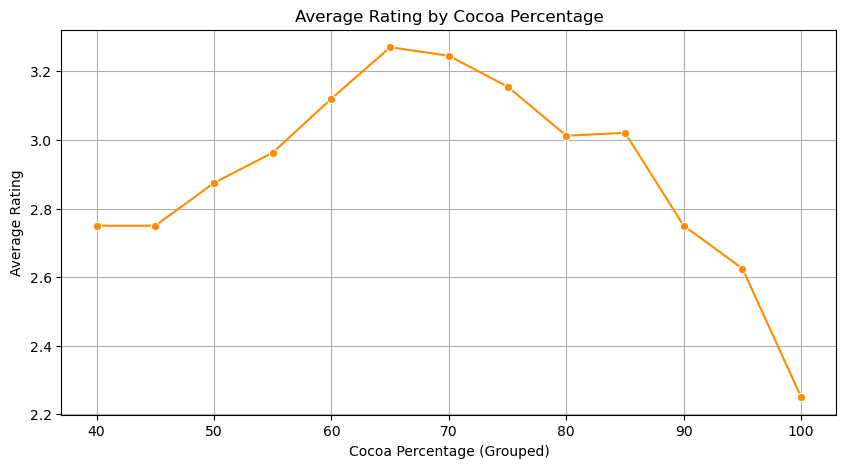

In [31]:
#Compare Average Ratings Across Different Cocoa Percentages
# Round Cocoa Percent to nearest 5 for better grouping
df['Cocoa Group'] = (df['Cocoa Percent'] // 5) * 5

# Group and calculate mean rating
avg_rating_by_cocoa = df.groupby('Cocoa Group')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_rating_by_cocoa, x='Cocoa Group', y='Rating', marker='o', color='darkorange')
plt.title("Average Rating by Cocoa Percentage")
plt.xlabel("Cocoa Percentage (Grouped)")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

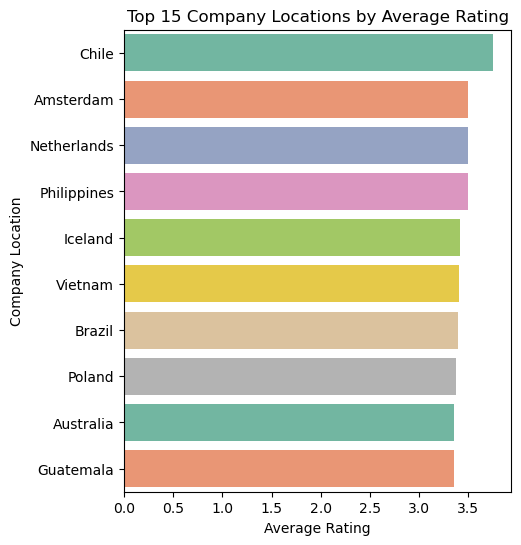

In [34]:
#Compare Average Ratings by Company Location (Bar Chart)
avg_rating_by_location = df.groupby('Company Location')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(5, 6))
sns.barplot(x=avg_rating_by_location.values, y=avg_rating_by_location.index, palette='Set2')
plt.title("Top 15 Company Locations by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Company Location")
plt.show()

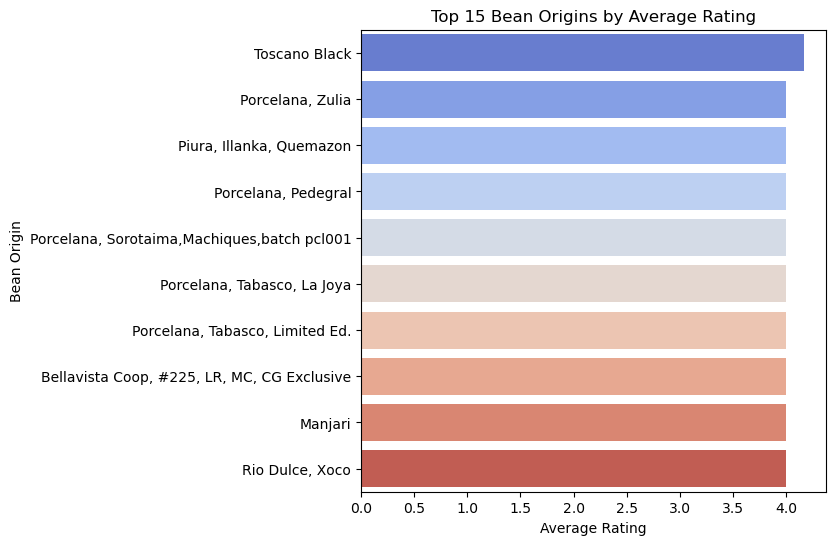

In [36]:
#Compare Ratings Based on Bean Origin
avg_rating_by_origin = df.groupby('Bean Origin')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 6))
sns.barplot(x=avg_rating_by_origin.values, y=avg_rating_by_origin.index, palette='coolwarm')
plt.title("Top 15 Bean Origins by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Bean Origin")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


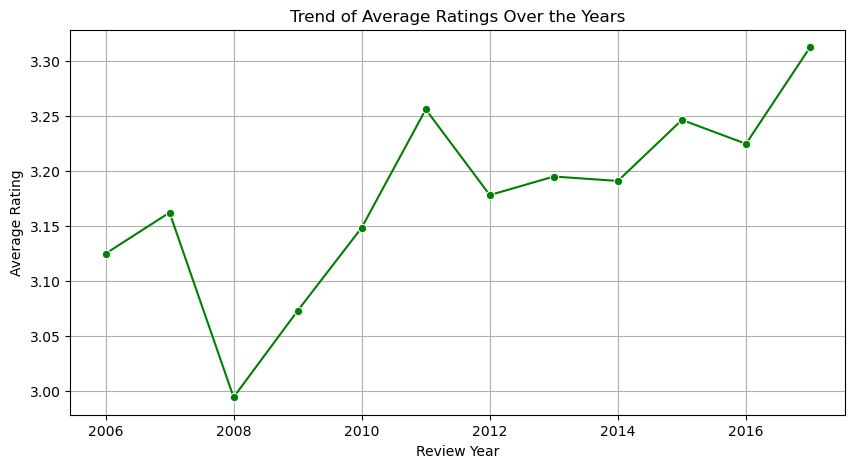

In [37]:
#Plot Trend of Average Ratings Over Review Years
df['Review Date'] = df['Review Date'].astype(int)

avg_rating_by_year = df.groupby('Review Date')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_rating_by_year, x='Review Date', y='Rating', marker='o', color='green')
plt.title("Trend of Average Ratings Over the Years")
plt.xlabel("Review Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

In [38]:
#Find Companies that Have Reviewed Chocolates from Multiple Bean Origins
# Count unique bean origins per company
multi_origin_companies = df.groupby('Company')['Bean Origin'].nunique()
multi_origin_companies = multi_origin_companies[multi_origin_companies > 1].sort_values(ascending=False)

# Show top 10
multi_origin_companies.head(10)


Company
Soma                          46
Bonnat                        27
Fresco                        26
Pralus                        25
Guittard                      22
Domori                        22
Arete                         21
Valrhona                      21
A. Morin                      20
Hotel Chocolat (Coppeneur)    19
Name: Bean Origin, dtype: int64

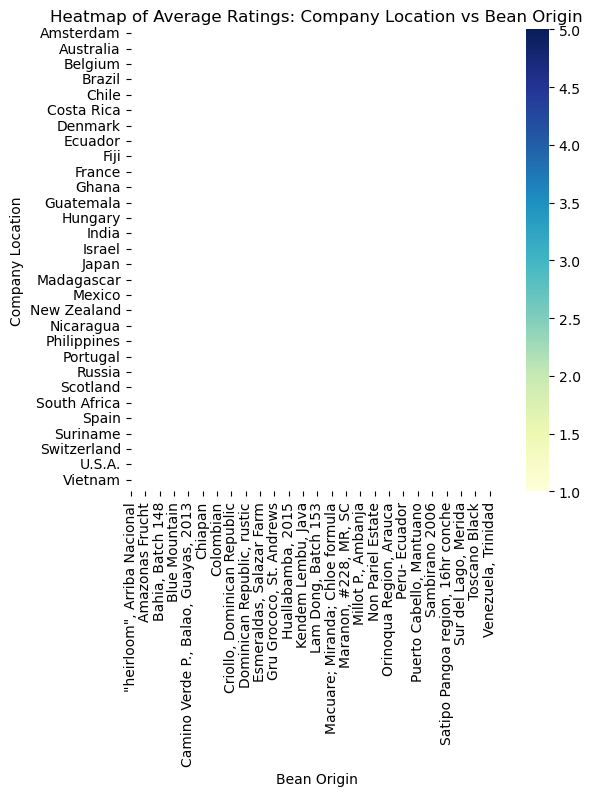

In [44]:
# Plot Heatmap: Company Location vs Bean Origin with Average Ratings
# Create pivot table
pivot_table = df.pivot_table(index='Company Location', columns='Bean Origin', values='Rating', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Average Ratings: Company Location vs Bean Origin")
plt.xlabel("Bean Origin")
plt.ylabel("Company Location")
plt.show()

In [45]:
#Identify the Most Consistent Companies (Lowest Standard Deviation in Ratings)
# Filter companies with at least 5 reviews
company_ratings = df.groupby('Company')['Rating'].agg(['count', 'std'])
consistent_companies = company_ratings[company_ratings['count'] >= 5].sort_values(by='std')

# Show top 10 most consistent companies
consistent_companies.head(10)


,count,std
Company,,
Starchild,5,0.000000
Ethel's Artisan (Mars),5,0.111803
Guido Castagna,5,0.111803
Soul,6,0.136931
organicfair,5,0.136931
Dark Forest,5,0.136931
Ambrosia,6,0.158114
Letterpress,9,0.176777
Zak's,6,0.188193


Advanced Level (Machine Learning, Insights, Web)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
#Build a Linear Regression Model

features = df[['Cocoa Percent', 'Bean Origin', 'Company Location']]
target = df['Rating']

# One-hot encode categorical features
encoded_features = pd.get_dummies(features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(encoded_features, target, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

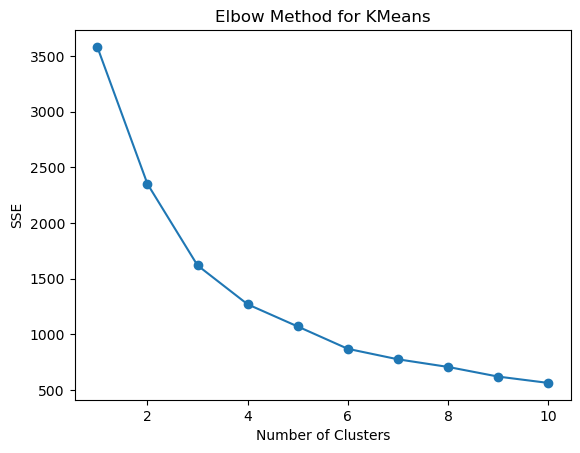

In [48]:
#Use Clustering (KMeans)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Goal: Group chocolates into similar types based on features (like Rating, Cocoa %, etc.)

# Use numerical features only
cluster_data = df[['Rating', 'Cocoa Percent']].dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Elbow method to find optimal clusters
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot elbow
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for KMeans")
plt.show()

2025-04-06 09:47:23.019 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


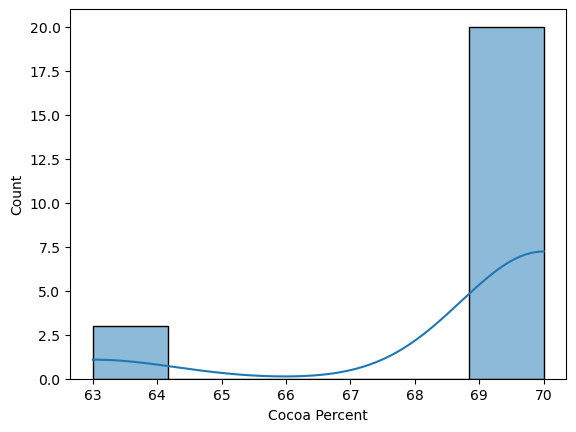

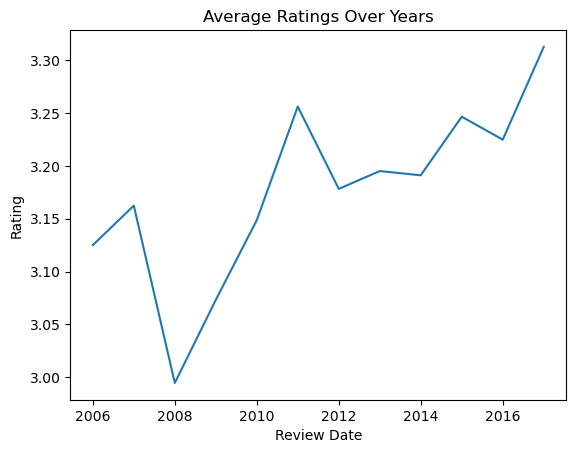

In [49]:
#Build a Dashboard (Streamlit)
#Streamlit helps you create a live, interactive dashboard.
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("flavors_of_cocoa.csv")
df['Cocoa Percent'] = df['Cocoa Percent'].astype(str).str.replace('%','').astype(float)

st.title("Chocolate Ratings Dashboard")

# Filter by company
company = st.selectbox("Select a company", df['Company'].unique())
filtered_df = df[df['Company'] == company]

st.write("Company Data", filtered_df)

# Cocoa % distribution
fig, ax = plt.subplots()
sns.histplot(filtered_df['Cocoa Percent'], kde=True, ax=ax)
st.pyplot(fig)

# Average rating over years
if 'Review Date' in df.columns:
    fig2, ax2 = plt.subplots()
    trend = df.groupby('Review Date')['Rating'].mean().reset_index()
    sns.lineplot(data=trend, x='Review Date', y='Rating', ax=ax2)
    ax2.set_title("Average Ratings Over Years")
    st.pyplot(fig2)

In [50]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)